<a href="https://colab.research.google.com/github/MIcoder003/Undewater_Pothole_detection/blob/main/Image_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from PIL import Image
import numpy as np
from google.colab.patches import cv2_imshow
import cv2

# Funtion for generating distorted

def type7img(org_img):
    # Load the original image J(x)
    original_image = Image.open(org_img)  # Replace with your image file path
    response_function = np.array([1.0, 1.0, 1.0])
    original_image = original_image / response_function
    # Load the background light B
    background_light = 1 # Replace with your background light value

    # Define the N values for each color channel
    N_red = 0.805
    N_blue = 0.982
    N_green = 0.961

    # Convert the original image to a NumPy array
    original_image_array = np.array(original_image)

    # Calculate the transmission map t(x) for each pixel using N values
    transmission_map = 255 * (1 - (original_image_array / 255) * (N_red + N_blue + N_green) / 3)

    # Ensure the transmission map values are within the valid range [0, 255]
    transmission_map = np.clip(transmission_map, 0, 255).astype(np.uint8)

    # Calculate the inverse transmission map 1 - t(x)
    inverse_transmission_map = 255 - transmission_map

    # Compute the degraded image I(x) using the provided equation
    degraded_image_array = (original_image_array * transmission_map / 255) + (background_light * inverse_transmission_map / 255)
    degraded_image_array = np.clip(degraded_image_array, 0, 255).astype(np.uint8)

    Gaussian = cv2.GaussianBlur(degraded_image_array.astype(np.uint8), (5, 5), 0)

    # Convert the degraded image array back to a Pillow image
    degraded_image = Image.fromarray(Gaussian)

    # Display or save the degraded image
    # degraded_image.show()
    # degraded_image.save("degraded_image"+ original_image  +".jpg")  # Save the degraded image if needed

    return degraded_image


In [ ]:
# Function to apply blur
image = cv2.imread("/content/drive/MyDrive/Potholes/IMG/Pothole-001.jpg")
Gaussian = cv2.GaussianBlur(image.astype(np.uint8), (5, 5), 0)\
im_name = "/content/drive/MyDrive/Potholes/IMG/Pothole-001.jpg"
im_name.split("/")[5]


'IMG'

array([[[44, 49, 70],
        [44, 49, 70],
        [43, 48, 69],
        ...,
        [47, 41, 36],
        [52, 46, 41],
        [54, 48, 43]],

       [[46, 51, 72],
        [45, 51, 71],
        [44, 50, 70],
        ...,
        [48, 42, 37],
        [52, 46, 41],
        [54, 48, 43]],

       [[47, 53, 72],
        [47, 53, 72],
        [46, 52, 71],
        ...,
        [49, 43, 38],
        [54, 48, 43],
        [56, 50, 45]],

       ...,

       [[47, 47, 47],
        [45, 45, 45],
        [39, 39, 39],
        ...,
        [31, 33, 34],
        [32, 34, 35],
        [32, 34, 35]],

       [[48, 48, 48],
        [45, 45, 45],
        [38, 38, 38],
        ...,
        [30, 32, 33],
        [31, 33, 34],
        [32, 34, 35]],

       [[48, 48, 48],
        [45, 45, 45],
        [38, 38, 38],
        ...,
        [29, 31, 32],
        [31, 33, 34],
        [31, 33, 34]]], dtype=uint8)
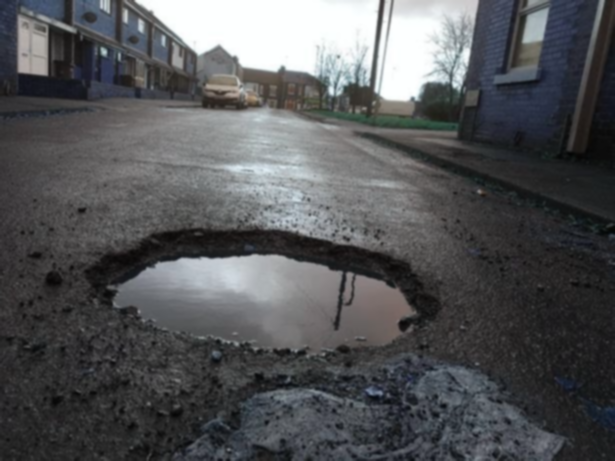

In [ ]:
Gaussian

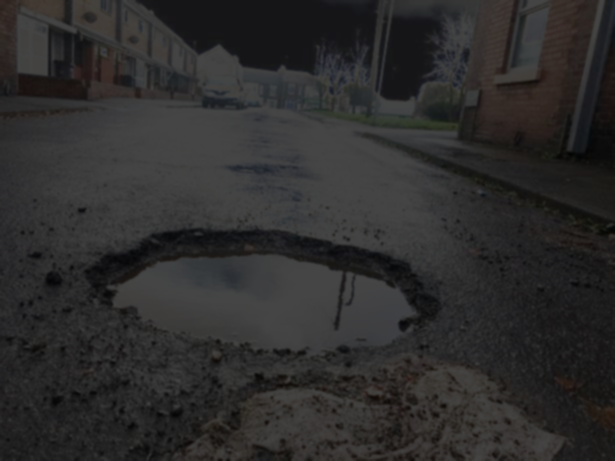

In [ ]:
type7img("/content/drive/MyDrive/Potholes/IMG/Pothole-001.jpg")



In [ ]:
import os
import numpy as np
from PIL import Image
# from tqdm import tqdm
import logging
# import matplotlib.pyplot as plt

image = np.array(Image.open("/content/drive/MyDrive/Potholes/IMG/Pothole-145.jpg"))
depth = output
logging.info(f"Image: {image.shape}, {image.dtype}, {np.max(image)}, {np.min(image)}")
logging.info(f"Depth: {depth.shape}, {depth.dtype}, {np.max(depth)}, {np.min(depth)}")

print(depth)
# Remove blank edges
image0 = image[10:-10, 10:-10, :] / 255
depth0 = depth[10:-10, 10:-10] / 255

deep = 0.5
horization = 1

print(deep, horization)

TYPE = [0.620, 0.610, 0.500]

A = 0.5 * np.array(TYPE)**deep
t = np.zeros(image0.shape)
t[:, :, 0] = TYPE[0]**(depth0 * horization)
t[:, :, 1] = TYPE[1]**(depth0 * horization)
t[:, :, 2] = TYPE[2]**(depth0 * horization)

I =  A * image0 * t + (1 - t) * A

underwater_img = Image.fromarray((np.clip(I, 0, 1) * 255).astype(np.uint8))


NameError: name 'output' is not defined

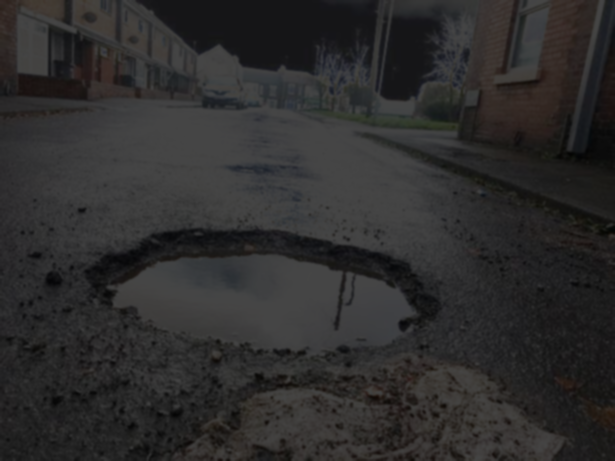

In [ ]:
type7img("/content/drive/MyDrive/Potholes/IMG/Pothole-001.jpg")